<a href="https://colab.research.google.com/github/mahdie-1993/Machine_learning_with_Python_project/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas
import pandas as pd
# importing numpy
import numpy as np
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# reading dataset
df = pd.read_csv('/content/1632300362534233 (1).csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
df.shape

(3479, 8)

In [ ]:
df = df.drop(2802)
df = df.drop(2171)
df = df.drop(1604)
df = df.drop(807)
df = df.drop(709)
df = df.drop(570)
print(df.shape)

(3473, 8)


In [ ]:
pd.set_option('display.max_rows',None, "display.max_columns", None)

In [ ]:
df = df.dropna()
print(df.shape)

(3450, 8)


In [ ]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [ ]:
#df.Address.value_counts().sort_values(ascending=False).head(25)

In [ ]:
# make list with top 25 variables
labels = [x for x in df.Address.value_counts().sort_values(ascending=False).index]
labels

['Punak',
 'Pardis',
 'West Ferdows Boulevard',
 'Gheitarieh',
 'Shahran',
 'Saadat Abad',
 'Parand',
 'Shahr-e-Ziba',
 'Southern Janatabad',
 'Jeyhoon',
 'Central Janatabad',
 'Persian Gulf Martyrs Lake',
 'Andisheh',
 'Ostad Moein',
 'East Ferdows Boulevard',
 'Shahrake Qods',
 'Niavaran',
 'Pasdaran',
 'Pirouzi',
 'Salsabil',
 'Shahrake Gharb',
 'Farmanieh',
 'Heravi',
 'Ekhtiarieh',
 'Islamshahr',
 'Yousef Abad',
 'Feiz Garden',
 'Northern Janatabad',
 'Qasr-od-Dasht',
 'North Program Organization',
 'Zaferanieh',
 'Beryanak',
 'Narmak',
 'Aqdasieh',
 'Pakdasht',
 'Azarbaijan',
 'Si Metri Ji',
 'Tenant',
 'Southern Program Organization',
 'Abazar',
 'Damavand',
 'Velenjak',
 'Marzdaran',
 'Karoon',
 'Jordan',
 'Elahieh',
 'Northern Chitgar',
 'Kahrizak',
 'Golestan',
 'Mirdamad',
 'Northren Jamalzadeh',
 'Kamranieh',
 'Amirabad',
 'Dorous',
 'Hashemi',
 'Sattarkhan',
 'Amirieh',
 'Shahryar',
 'West Pars',
 'Qalandari',
 'Rudhen',
 'Railway',
 'Qazvin Imamzadeh Hassan',
 'Komeil',
 

In [ ]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
  for label in top_x_labels:
     df2[variable+'_'+label] = np.where(df[variable]==label,1,0)
# read the data again
#data = pd.read_csv('/content/1632300362534233 (1).csv')#,usecols = ['Address'] )
#encode Address into the 25 most frequent categories
top_x(df,'Address',labels)
# display data
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
df.shape

(3450, 200)

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df = df.drop('Price' , axis=1)
df.head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,1,Shahran,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
df = df.drop('Address' , axis=1)
df.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,1,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
df.shape

(3450, 198)

In [ ]:
df['Price(USD)'].describe()

count    3.450000e+03
mean     1.791854e+05
std      2.708639e+05
min      1.200000e+02
25%      4.730833e+04
50%      9.666667e+04
75%      2.000000e+05
max      3.080000e+06
Name: Price(USD), dtype: float64

In [ ]:
# Print the shape of dataset
print(df.shape)

(3450, 198)


In [ ]:
df['Area'] = df['Area'].astype(np.int64) 

In [ ]:
df['Area'].head()

0     63
1     60
2     79
3     95
4    123
Name: Area, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)',
       'Address_Punak', 'Address_Pardis', 'Address_West Ferdows Boulevard',
       'Address_Gheitarieh',
       ...
       'Address_Ray - Pilgosh', 'Address_Aliabad South', 'Address_Boloorsazi',
       'Address_Mehrabad River River', 'Address_Varamin - Beheshti',
       'Address_Telecommunication', 'Address_Mirza Shirazi',
       'Address_Firoozkooh Kuhsar', 'Address_Ghiyamdasht',
       'Address_Yakhchiabad'],
      dtype='object', length=198)

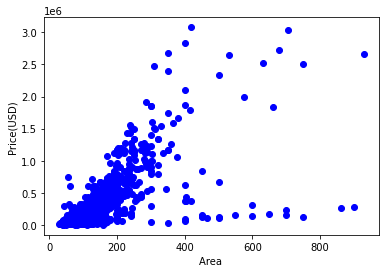

In [ ]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area ")
plt.ylabel("Price(USD)")
plt.show()

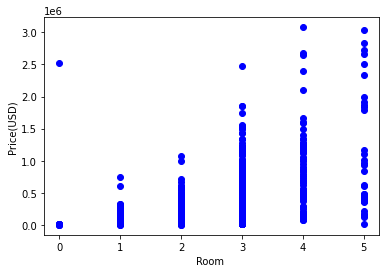

In [ ]:
plt.scatter(df['Room'], df['Price(USD)'],  color='blue')
plt.xlabel("Room ")
plt.ylabel("Price(USD)")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


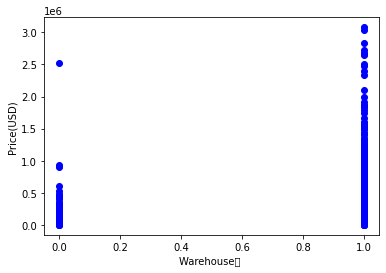

In [ ]:
plt.scatter(df['Warehouse'], df['Price(USD)'],  color='blue')
plt.xlabel("Warehouse	 ")
plt.ylabel("Price(USD)")
plt.show()

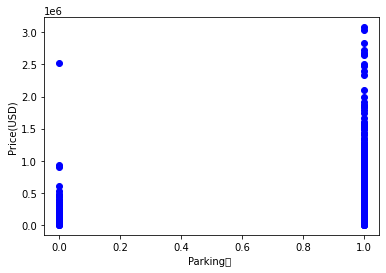

In [ ]:

plt.scatter(df['Parking'], df['Price(USD)'],  color='blue')
plt.xlabel("Parking	 ")
plt.ylabel("Price(USD)")
plt.show()

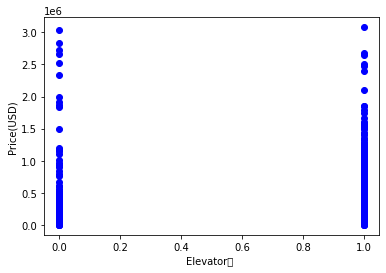

In [ ]:
plt.scatter(df['Elevator'], df['Price(USD)'],  color='blue')
plt.xlabel("Elevator	 ")
plt.ylabel("Price(USD)")
plt.show()

In [ ]:
df = df.drop('Elevator' , axis=1)
df.head(3)

,Area,Room,Parking,Warehouse,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
pd.set_option( "display.max_columns", None)

In [ ]:
df.head(5)

,Area,Room,Parking,Warehouse,Price(USD),Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,61666.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
X = df.drop("Price(USD)" , axis = "columns")
X.head()

,Area,Room,Parking,Warehouse,Address_Punak,Address_Pardis,Address_West Ferdows Boulevard,Address_Gheitarieh,Address_Shahran,Address_Saadat Abad,Address_Parand,Address_Shahr-e-Ziba,Address_Southern Janatabad,Address_Jeyhoon,Address_Central Janatabad,Address_Persian Gulf Martyrs Lake,Address_Andisheh,Address_Ostad Moein,Address_East Ferdows Boulevard,Address_Shahrake Qods,Address_Niavaran,Address_Pasdaran,Address_Pirouzi,Address_Salsabil,Address_Shahrake Gharb,Address_Farmanieh,Address_Heravi,Address_Ekhtiarieh,Address_Islamshahr,Address_Yousef Abad,Address_Feiz Garden,Address_Northern Janatabad,Address_Qasr-od-Dasht,Address_North Program Organization,Address_Zaferanieh,Address_Beryanak,Address_Narmak,Address_Aqdasieh,Address_Pakdasht,Address_Azarbaijan,Address_Si Metri Ji,Address_Tenant,Address_Southern Program Organization,Address_Abazar,Address_Damavand,Address_Velenjak,Address_Marzdaran,Address_Karoon,Address_Jordan,Address_Elahieh,Address_Northern Chitgar,Address_Kahrizak,Address_Golestan,Address_Mirdamad,Address_Northren Jamalzadeh,Address_Kamranieh,Address_Amirabad,Address_Dorous,Address_Hashemi,Address_Sattarkhan,Address_Amirieh,Address_Shahryar,Address_West Pars,Address_Qalandari,Address_Rudhen,Address_Railway,Address_Qazvin Imamzadeh Hassan,Address_Komeil,Address_Zafar,Address_Gholhak,Address_Ozgol,Address_Air force,Address_Fallah,Address_Araj,Address_Dehkade Olampic,Address_Dezashib,Address_Ray,Address_Gisha,Address_Kook,Address_East Pars,Address_Tehransar,Address_Parastar,Address_Mehran,Address_Shams Abad,Address_Baghestan,Address_Razi,Address_Ekbatan,Address_Tajrish,Address_Valiasr,Address_Hor Square,Address_Tarasht,Address_Sadeghieh,Address_Afsarieh,Address_Absard,Address_Southern Chitgar,Address_Azadshahr,Address_ShahrAra,Address_Qarchak,Address_Shahrake Quds,Address_Hakimiyeh,Address_Ajudaniye,Address_Shahedshahr,Address_Lavasan,Address_Zargandeh,Address_Northern Suhrawardi,Address_Water Organization,Address_Koohsar,Address_Tehran Now,Address_Keshavarz Boulevard,Address_Amir Bahador,Address_Heshmatieh,Address_Eskandari,Address_Republic,Address_Mahallati,Address_Karimkhan,Address_Elm-o-Sanat,Address_Daryan No,Address_Mahmoudieh,Address_Yaftabad,Address_Fatemi,Address_Seyed Khandan,Address_Waterfall,Address_Shahrakeh Naft,Address_Khavaran,Address_Darabad,Address_Abuzar,Address_Atabak,Address_Southern Suhrawardi,Address_Lavizan,Address_Nezamabad,Address_Malard,Address_Vahidieh,Address_Haft Tir,Address_Nawab,Address_Hekmat,Address_Argentina,Address_Garden of Saba,Address_Shahrake Azadi,Address_Vahidiyeh,Address_Robat Karim,Address_Majidieh,Address_Taslihat,Address_Pishva,Address_Abbasabad,Address_Ghoba,Address_Sabalan,Address_Ahang,Address_Shahrake Shahid Bagheri,Address_Shoosh,Address_Chidz,Address_Nasim Shahr,Address_Moniriyeh,Address_Vanak,Address_Dolatabad,Address_Shahrake Madaen,Address_Chardivari,Address_Azari,Address_Shahrake Apadana,Address_Bahar,Address_Darband,Address_Eram,Address_Baqershahr,Address_SabaShahr,Address_Chardangeh,Address_Chahardangeh,Address_Salehabad,Address_Enghelab,Address_Islamshahr Elahieh,Address_Ray - Montazeri,Address_Sohanak,Address_Mehrabad,Address_Pakdasht KhatunAbad,Address_Kazemabad,Address_Villa,Address_Thirteen November,Address_Zibadasht,Address_Firoozkooh,Address_Darakeh,Address_Gandhi,Address_Javadiyeh,Address_Naziabad,Address_Shadabad,Address_Hassan Abad,Address_Safadasht,Address_Khademabad Garden,Address_Alborz Complex,Address_Ray - Pilgosh,Address_Aliabad South,Address_Boloorsazi,Address_Mehrabad River River,Address_Varamin - Beheshti,Address_Telecommunication,Address_Mirza Shirazi,Address_Firoozkooh Kuhsar,Address_Ghiyamdasht,Address_Yakhchiabad
0,63,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
y = df['Price(USD)']
y.head()

0     61666.67
1     61666.67
2     18333.33
3     30083.33
4    233333.33
Name: Price(USD), dtype: float64

In [ ]:
# Split the dataset into traning data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2760, 196)
(690, 196)
(2760,)
(690,)


In [ ]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
rgr.fit(X_train,y_train)
rgr.score(X_test,y_test)

0.7080601532284392